In [1]:
import pandas as pd

# Load data
xls1 = pd.ExcelFile("E:\\数学建模国赛2023选题\\C题\\第一题数据预处理结果.xlsx")
df1=pd.read_excel(xls1)

In [2]:
df1

,Unnamed: 0,销售日期,销量(千克),销售单价(元/千克),单品名称,分类名称
0,0,2020-07-01,0.396,7.6,泡泡椒(精品),辣椒类
1,1,2020-07-01,0.849,3.2,大白菜,花叶类
2,2,2020-07-01,0.409,7.6,泡泡椒(精品),辣椒类
3,3,2020-07-01,0.421,10.0,上海青,花叶类
4,4,2020-07-01,0.539,8.0,菜心,花叶类
...,...,...,...,...,...,...
878498,878498,2023-06-30,0.284,24.0,西峡花菇(1),食用菌
878499,878499,2023-06-30,0.669,12.0,长线茄,茄类
878500,878500,2023-06-30,0.125,24.0,西峡花菇(1),食用菌
878501,878501,2023-06-30,0.252,5.2,芜湖青椒(1),辣椒类


In [3]:
# 移除可能多余的索引列
df1.drop(columns=['Unnamed: 0','销售单价(元/千克)'], inplace=True, errors='ignore')

# 显示前几行以确认更改
df1.head()


,销售日期,销量(千克),单品名称,分类名称
0,2020-07-01,0.396,泡泡椒(精品),辣椒类
1,2020-07-01,0.849,大白菜,花叶类
2,2020-07-01,0.409,泡泡椒(精品),辣椒类
3,2020-07-01,0.421,上海青,花叶类
4,2020-07-01,0.539,菜心,花叶类


In [4]:
# 准备数据：将数据转换为日期-商品矩阵，其中行表示日期，列表示商品。
# 如果在同一天内有多个相同的商品被购买，我们将其销量求和。
transaction_data_by_date = df1.groupby(['销售日期', '单品名称'])['销量(千克)'].sum().unstack().fillna(0)

# 将销量转换为0和1（0表示未购买，1表示购买）
transaction_data_by_date_binary = transaction_data_by_date.applymap(lambda x: 1 if x > 0 else 0)

# 显示转换后的数据的前几行
transaction_data_by_date_binary


单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-02,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-03,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-04,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-05,1,0,0,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-06-27,0,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2023-06-28,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
transaction_data_by_date_binary = transaction_data_by_date_binary.astype(bool)
transaction_data_by_date_binary

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,True,False,False,True,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2020-07-02,True,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2020-07-03,True,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2020-07-04,True,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2020-07-05,True,False,False,True,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,False,True,False,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2023-06-27,False,True,False,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2023-06-28,False,True,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
correlations = transaction_data_by_date_binary.corr()
correlations 

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
单品名称,,,,,,,,,,,,,,,,,,,,,
七彩椒(1),1.000000,-0.258710,0.008392,0.200651,-0.252517,0.009148,-0.063511,0.277180,-0.308397,0.240910,...,-0.297671,-0.139303,0.193330,-0.016130,-0.095122,-0.031354,-0.031354,0.188066,-0.031354,-0.147839
七彩椒(2),-0.258710,1.000000,-0.053871,-0.243726,0.185309,-0.359743,-0.008549,-0.641552,0.613971,-0.555463,...,0.337378,0.020751,-0.295921,0.104315,-0.061432,0.011817,-0.029411,-0.068333,-0.029411,0.027950
七彩椒(份),0.008392,-0.053871,1.000000,0.040991,0.117093,-0.039541,-0.012876,0.060036,0.103861,0.056198,...,-0.049056,-0.025329,0.017287,-0.007192,-0.015408,-0.005079,-0.005079,-0.011800,-0.005079,-0.023946
上海青,0.200651,-0.243726,0.040991,1.000000,-0.662254,0.332011,0.056741,0.585760,-0.529485,0.546950,...,-0.670863,-0.492843,0.345486,0.031693,-0.227951,-0.075136,0.022379,0.030755,0.022379,-0.409020
上海青(份),-0.252517,0.185309,0.117093,-0.662254,1.000000,-0.081285,0.063311,-0.371917,0.610026,-0.371127,...,0.480977,0.369857,-0.230486,-0.044720,0.212722,0.048009,0.087803,-0.073369,0.048009,0.306785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑牛肝菌,-0.031354,0.011817,-0.005079,-0.075136,0.048009,-0.043076,-0.007030,-0.045469,0.031362,-0.090370,...,0.060090,-0.013828,-0.023518,-0.003927,-0.008412,1.000000,-0.002773,-0.006442,-0.002773,-0.013073
黑牛肝菌(盒),-0.031354,-0.029411,-0.005079,0.022379,0.087803,0.064366,-0.007030,0.032777,0.031362,0.030681,...,-0.026782,-0.013828,-0.023518,-0.003927,-0.008412,-0.002773,1.000000,-0.006442,-0.002773,-0.013073
黑皮鸡枞菌,0.188066,-0.068333,-0.011800,0.030755,-0.073369,-0.006471,-0.016333,0.076153,-0.095348,0.071284,...,-0.062226,-0.032128,0.054743,-0.009123,-0.019544,-0.006442,-0.006442,1.000000,-0.006442,-0.030375


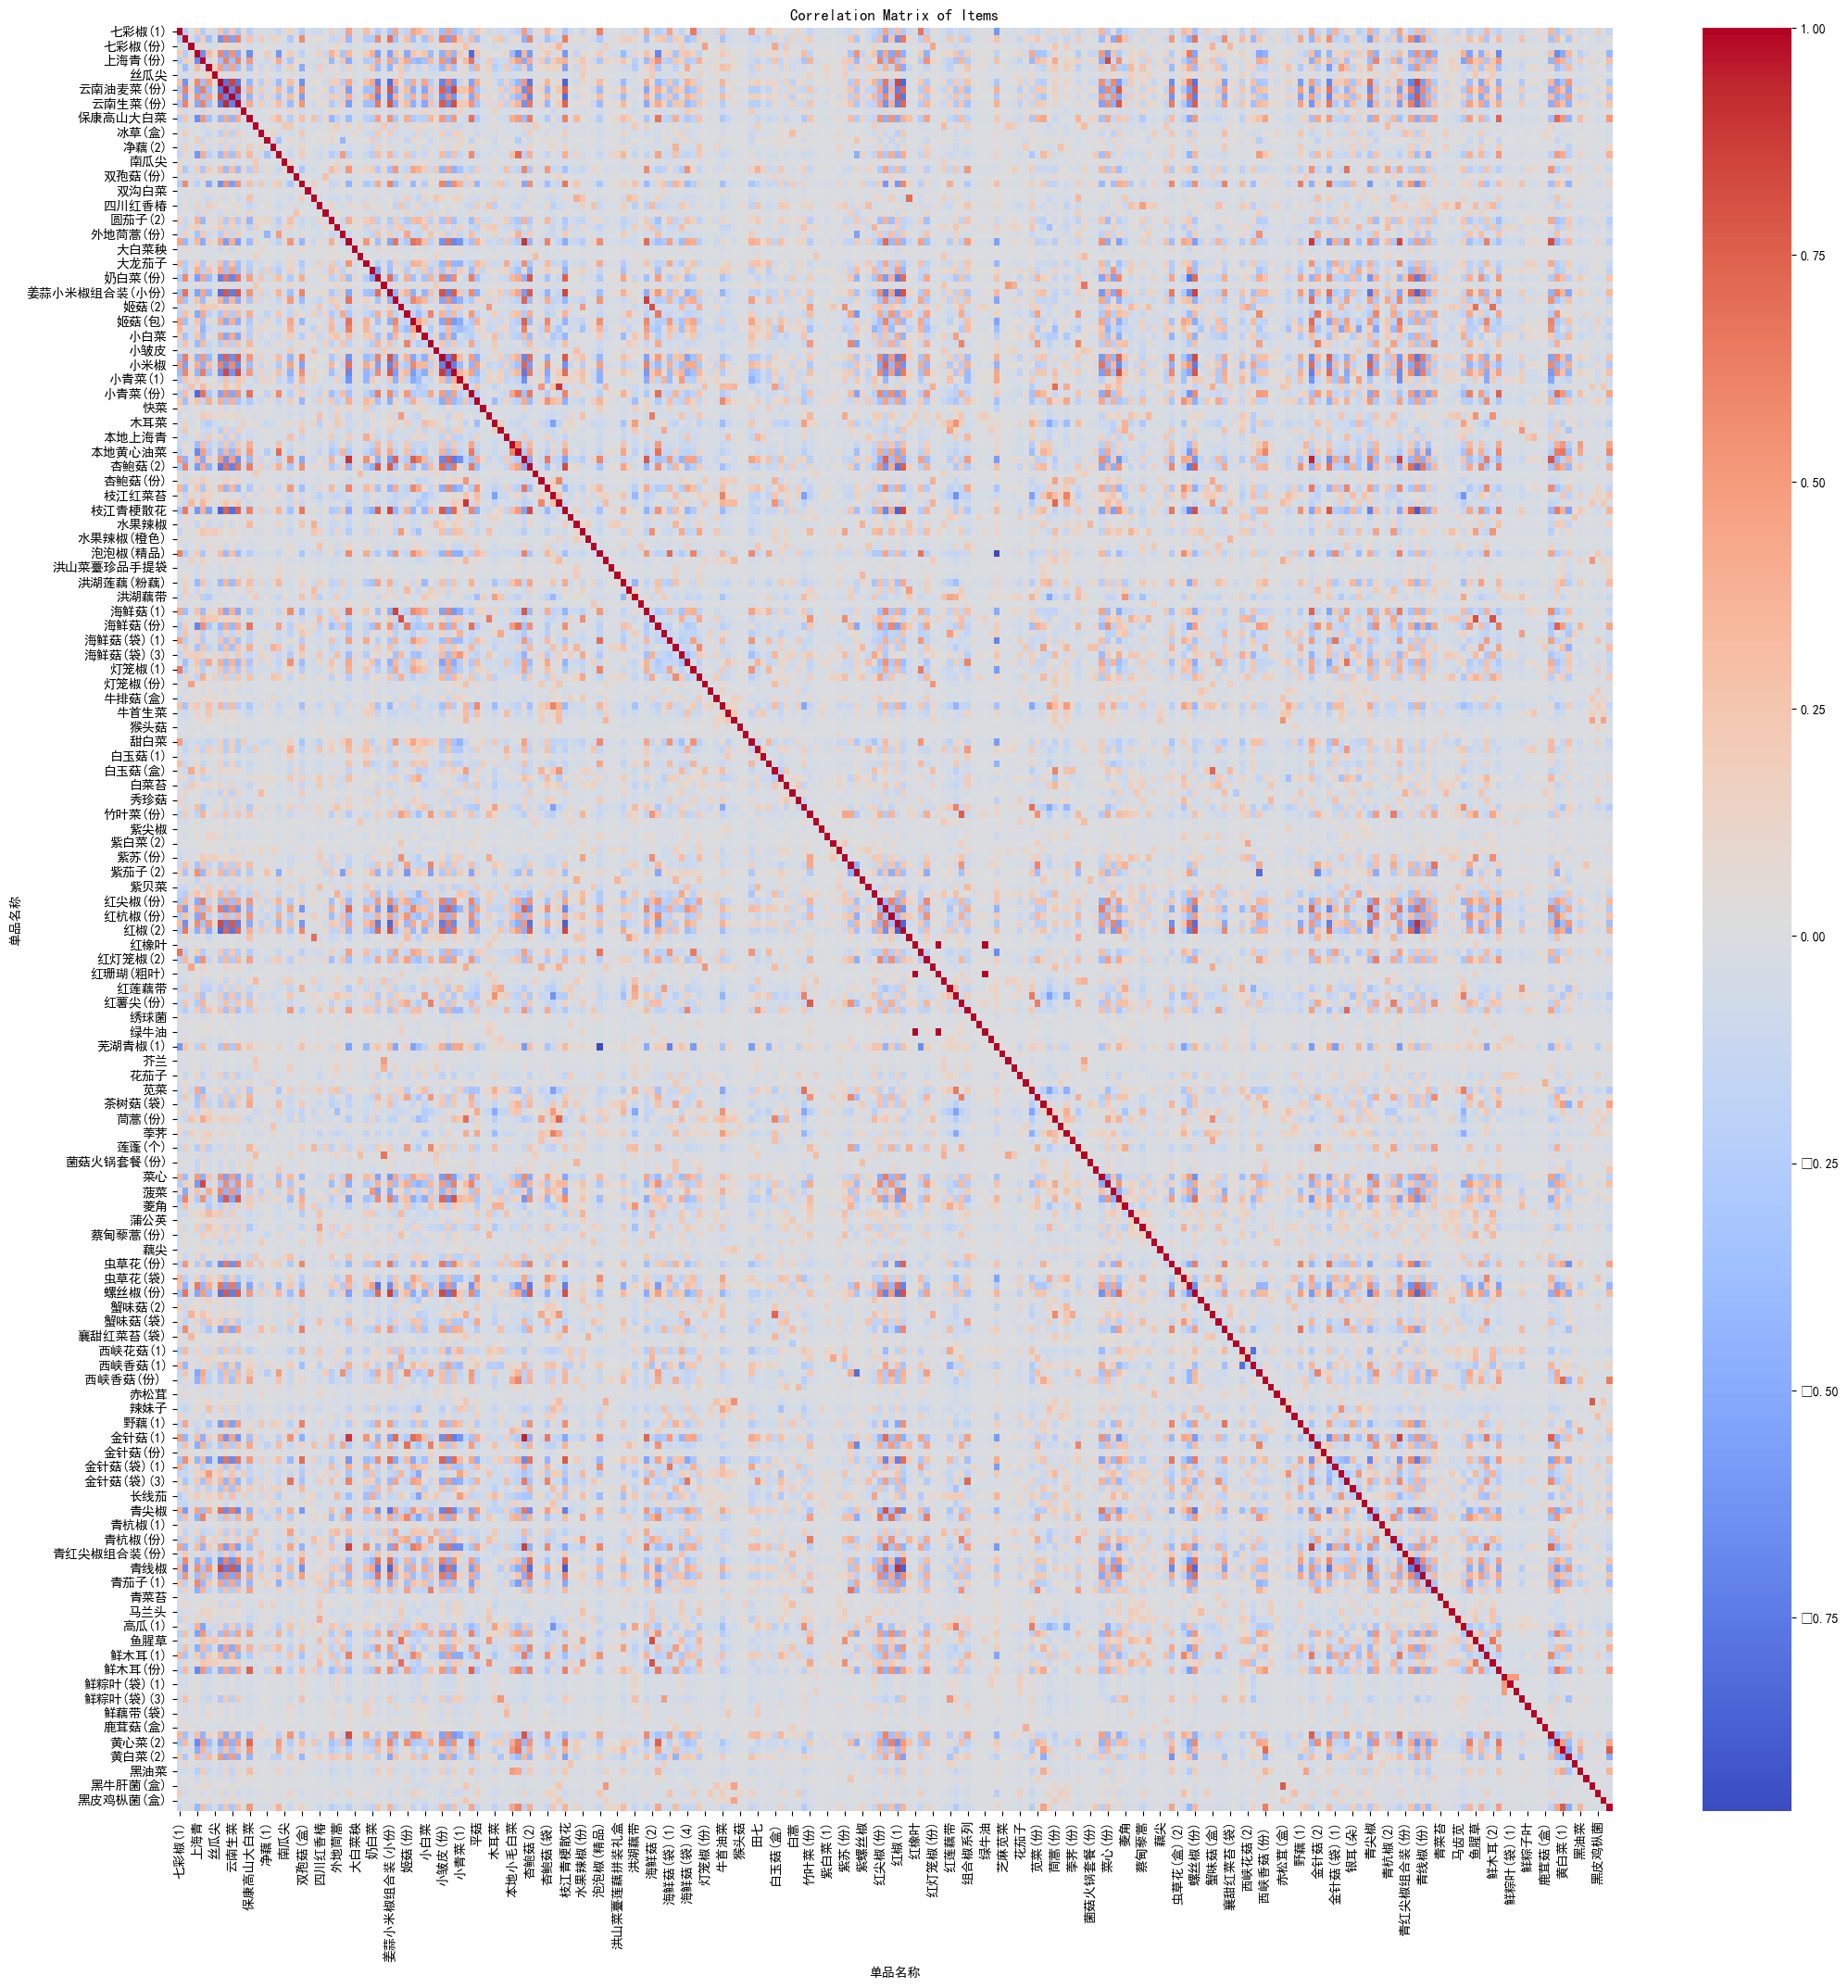

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']


# 绘制相关性矩阵的热图
# 绘制相关性矩阵的热图，只显示颜色而不显示具体数值
plt.figure(figsize=(25,25))
sns.heatmap(correlations, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of Items")
plt.show()


In [11]:
def extract_strong_correlations(correlation_matrix, threshold=0.8):
    """
    Extract pairs of items with strong correlations (above the given threshold).
    
    Parameters:
        correlation_matrix (pd.DataFrame): The correlation matrix of items.
        threshold (float): The correlation coefficient threshold for considering items as strongly correlated.
        
    Returns:
        strong_correlations (pd.DataFrame): A DataFrame containing pairs of strongly correlated items and their correlation coefficients.
    """
    
    # Drop self-correlations (diagonal elements)
    correlation_matrix_no_diag = correlation_matrix.copy()
    for item in correlation_matrix_no_diag:
        correlation_matrix_no_diag.loc[item, item] = 0.0
        
    # Extract pairs of items with strong correlations
    strong_correlations_list = []
    for col in correlation_matrix_no_diag.columns:
        strong_corr = correlation_matrix_no_diag.loc[correlation_matrix_no_diag[col] > threshold, col]
        for index, value in strong_corr.items():
            strong_correlations_list.append((col, index, value))
            
    strong_correlations_df = pd.DataFrame(strong_correlations_list, columns=['Item1', 'Item2', 'Correlation'])
    
    return strong_correlations_df

# 使用该函数提取相关性强的商品对
strong_correlations = extract_strong_correlations(correlations, threshold=0.8)
strong_correlations


,Item1,Item2,Correlation
0,上海青(份),菜心(份),0.837088
1,云南油麦菜,云南生菜,0.851055
2,云南油麦菜,红椒(1),0.838823
3,云南油麦菜,青线椒,0.845532
4,云南油麦菜(份),云南生菜(份),0.929272
...,...,...,...
61,青线椒,云南油麦菜,0.845532
62,青线椒,红椒(1),0.913631
63,鱼腥草,海鲜菇(2),0.815872
64,鲜木耳(2),海鲜菇(2),0.802104


In [13]:
def extract_strong_negative_correlations(correlation_matrix, threshold=-0.8):
    """
    Extract pairs of items with strong negative correlations (below the given threshold).
    
    Parameters:
        correlation_matrix (pd.DataFrame): The correlation matrix of items.
        threshold (float): The correlation coefficient threshold for considering items as strongly negatively correlated.
        
    Returns:
        strong_negative_correlations (pd.DataFrame): A DataFrame containing pairs of strongly negatively correlated items and their correlation coefficients.
    """
    
    # Drop self-correlations (diagonal elements)
    correlation_matrix_no_diag = correlation_matrix.copy()
    for item in correlation_matrix_no_diag:
        correlation_matrix_no_diag.loc[item, item] = 0.0
        
    # Extract pairs of items with strong negative correlations
    strong_negative_correlations_list = []
    for col in correlation_matrix_no_diag.columns:
        strong_negative_corr = correlation_matrix_no_diag.loc[correlation_matrix_no_diag[col] < threshold, col]
        for index, value in strong_negative_corr.items():
            strong_negative_correlations_list.append((col, index, value))
            
    strong_negative_correlations_df = pd.DataFrame(strong_negative_correlations_list, columns=['Item1', 'Item2', 'Correlation'])
    
    return strong_negative_correlations_df

# 使用该函数提取强负相关的商品对
strong_negative_correlations = extract_strong_negative_correlations(correlations, threshold=-0.8)
strong_negative_correlations


,Item1,Item2,Correlation
0,上海青,小青菜(份),-0.825104
1,云南油麦菜,姜蒜小米椒组合装(小份),-0.807276
2,云南油麦菜,枝江青梗散花,-0.851899
3,云南油麦菜,红椒(2),-0.835447
4,云南生菜,枝江青梗散花,-0.808555
5,姜蒜小米椒组合装(小份),云南油麦菜,-0.807276
6,姜蒜小米椒组合装(小份),红椒(1),-0.829173
7,姜蒜小米椒组合装(小份),青线椒,-0.845992
8,小青菜(份),上海青,-0.825104
9,枝江青梗散花,云南油麦菜,-0.851899
